# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения: `days_employed`,  `total_income`. `total_income`  — хранит данные о доходах, на сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [23]:
debts = data.debt.sum()/data['debt'].count()
float('{:,.2f}'.format(debts*100))
#процент невозвратов от общего количества кредитов

8.12

In [24]:
def my_mean(x): return x.mean()*100

In [25]:
s = data.groupby('children')['debt'].agg(['count', 'sum', my_mean])
s.round(2)

,count,sum,my_mean
children,,,
0,14091,1063,7.54
1,4808,444,9.23
2,2052,194,9.45
3,330,27,8.18
4,41,4,9.76
5,9,0,0.00


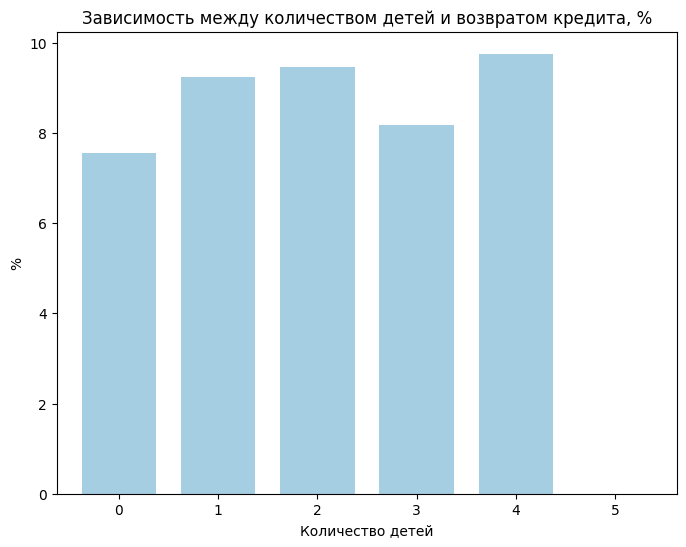

In [49]:
s['my_mean'].plot.bar(xlabel='Количество детей', ylabel='%', rot=0,
            width=0.75,      # Set bar width as 75% of space available
            figsize=(8,6),  # Set size of plot in inches
            colormap='Paired')
plt.title('Зависимость между количеством детей и возвратом кредита, %')
plt.show()

**Вывод: Покзатель по семьям с 5 детьми считаю нерепрезентативным, поскольку таких семей в выборке всего 9. Минимальный процент невозвратов у заемщиков без детей и составляет 7,5%. В семьях с детьми  процент невозвратов выше и колеблется в перелах 8,2% - 9,76%** 

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [27]:
f= data.groupby('family_status')['debt'].agg(['count', 'sum', my_mean])
f.round(2)

,count,sum,my_mean
family_status,,,
Не женат / не замужем,2796,273,9.76
в разводе,1189,84,7.06
вдовец / вдова,951,63,6.62
гражданский брак,4134,385,9.31
женат / замужем,12261,927,7.56


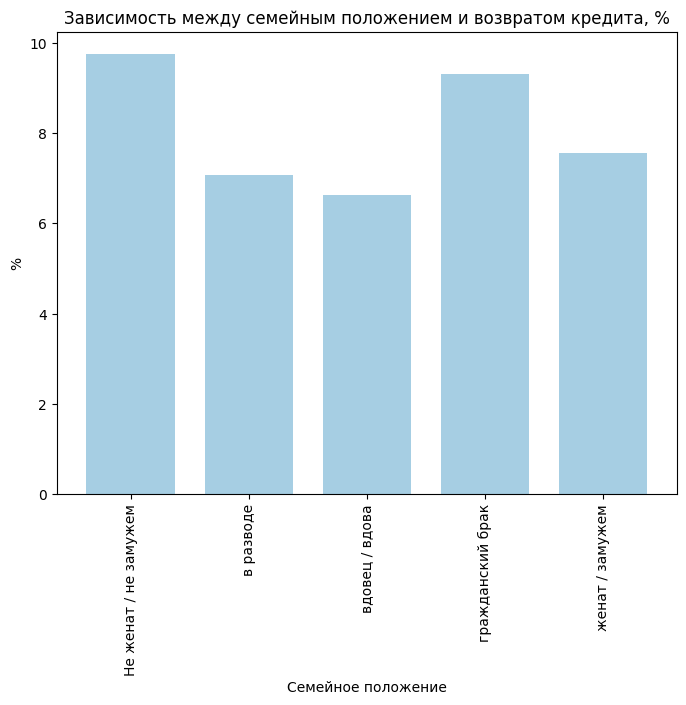

In [50]:
f['my_mean'].plot.bar(xlabel='Семейное положение', ylabel='%', 
                      width=0.75, 
                      figsize=(8,6), 
                      colormap='Paired')
plt.title('Зависимость между семейным положением и возвратом кредита, %')
plt.show()

**Вывод: Доля должников наиболее высокая у не женаты/не замужних и у состоящих в гражданском браке - 22,2%.  Минимальный процент должников у одиноких (статус - в разводе и вдовец/вдова) и составляет 7,06% и 6,62% и - 4,8%, видимо одинокому человеку вне отношений проще планировать бюджет. Овдовевшие это, как правило,  возрастные люди, а они более ответственные. Да и скорее всего у них уже есть взрослые дети, которые могут помогать с выплатами. В целом, можно сказать так: самые безответственные те, кто никогда не был в браке.** 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [51]:
i = data.groupby('total_income_category')['debt'].agg(['count', 'sum', my_mean])
i.round(2)

,count,sum,my_mean
total_income_category,,,
A,25,2,8.00
B,5014,354,7.06
C,15921,1353,8.50
D,349,21,6.02
E,22,2,9.09


**Вывод: Категории А и Е нерепрезентативны, поскольку таких заемщиков менее 30 человек (столбец COUNT). Процент должников в стальных группах распределяется в переделах 7-8%, что близко к среднему значению по всей выборке, коротый составил 8%. Чуть ниже уровень должников у заемщиков с доходом от 30 до 50 тыс и составляет 6%. В целом, думаю, можно сказать что уровень дохода не влияет на возврат кредита в срок**


#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [37]:
p=data.groupby('purpose_category')['debt'].agg(['count', 'sum', my_mean])
p.round(2)

,count,sum,my_mean
purpose_category,,,
операции с автомобилем,4279,400,9.35
операции с недвижимостью,10751,780,7.26
получение образования,3988,369,9.25
проведение свадьбы,2313,183,7.91


**Вывод: Процент невозвратов по кредитам на авто и образование в среднем выше почти на 2% (9,35% и 9,25% соответственно) по сревнению с опрерацями с недвиживотсть - 7,26% и на проведение свадеб - около 7,91%** 

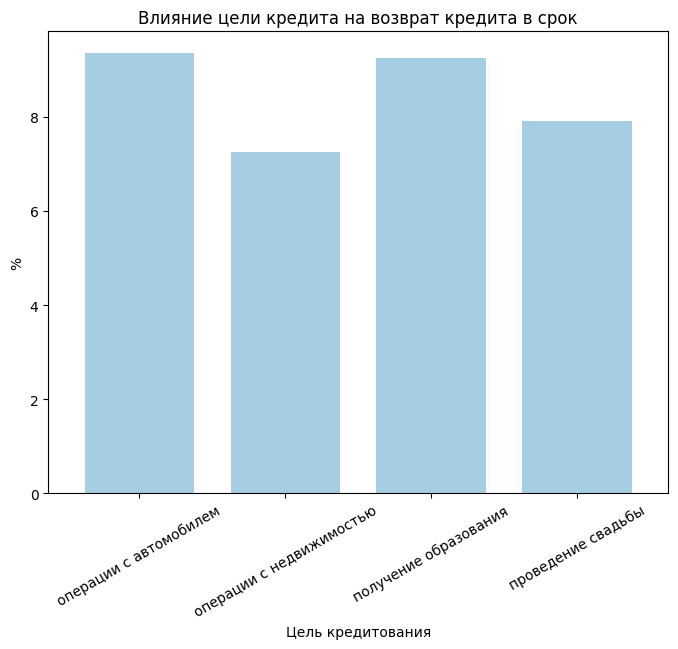

In [59]:
p['my_mean'].plot.bar(xlabel='Цель кредитования', ylabel='%', rot=30,
                      width=0.75, 
                      figsize=(8,6), 
                      colormap='Paired')
plt.title('Влияние цели кредита на возврат кредита в срок')
plt.show()

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

**Ответ: Пропуски допущены в 2х столбцах из 12, а именно days_employed и total_income причем одновременно. Следовательно, видимо кредитозаемщик не работает и не имеет дохода, что невозможно для получения кредита. Скорее всего, пропуски возникли случайно. Возможно какой-то сбой в программе, на человеческий фактор тоже не похоже.** 

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

In [39]:
data['days_employed'].max()

401755.40047533

In [40]:
data['days_employed'].min()

24.14163324048118

In [41]:
data['days_employed'].mean()

67148.97213258488

In [42]:
data['days_employed'].median()

1996.732855437927

In [43]:
data['total_income'].max()

2265604

In [44]:
data['total_income'].min()

20667

In [45]:
data['total_income'].mean()

165342.74576906848

In [46]:
data['total_income'].median()

142594.0

**Ответ: Заполнять пропуски при широком диапазоне выборки лучше медианой, поскольку есть оторванные от основной массы лидеры, их результаты сильно смещают значение среднего. Особенно сильно это видно по days_employed** 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера  ✔️</h2>

Совершенно верно, медиана не так чувствительна к выборосам по сравнению со средним, например. Получается, мы всегда можем брать медиану (кроме тех случаев, когда нужно именно среднее). Если выборка смещена, то мы не ошибемся, а если распределение нормальное, где среднее очень близко к медиане, то тоже не ошибемся. Только тут важно понимать, что не стоит проводить заполнение пропусков, взятой медианой по всему столбцу, потому что это тоже искажение данных. 
</div>


### Шаг 4: общий вывод.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
    <b> ВЫВОД</b>
    

    В результате исследования была выявленна зависимость семейного положения и количества детей заемщика на факт погашения кредита в срок.  Также степень возврата кредита в срок определяет цель кредитования  .
  
    Риск невозврата кредитов у лиц со статусом "Не женат / не замужем" и  "В гражданском браке" выше на 2% чем у остальных категорий. Наличие детей сопряжено с непредвиденными расходами, что также увеличивает риск невозвратов на 1-2%.

    А кредиты на автомобили и на образование обладают более высоким риском невозврата по сравнению с кредитами на авто и недвижимостью примерно на 2%.
    
    Низкий уровень дохода (до 30 тыс.) является неблагоприятным фатором, но данных для однозначного заключеия мало. В целом зависимости между доходом и просрочкой не выявлено. 
    
   <b> 
       
    Менее благонадежным будет заемщик, находящийся в постоянных отношениях, с детьми и обратившийся за кредитов на авто или образование.
       
    Портрет наиболее надежного кредитозаемщика такой: вдовец или вдова без детей обратившийся за кредитом на операцию с недвижимостью. Заем на свадьбу не подходит, в таком случае семейный статус будет ближе к гражданскому браку, и риск возрастет как минимум на 3%.  
    
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера  ✔️</h2>

Хорошо написан вывод.
</div>